# Function Transformer
**Video: https://youtu.be/cTjj3LE8E90**

**There are lying under function transformer to transform a distribution to normal distribution:**

- Log Transformation
- Reciprocal Transformation
- Square & Square Root Transformation
- Custom Transformation

**How to find if data is normal?**

- Viasualize the data using the distplot of seaborn (seaborn.distplot)
- Can use the skew method of pandas library (pandas.skew). If the result comes to zero that's mean the data is normally distributed. If the data lies in positive or negative, then that data is not normally distributed.
- QQ Plot

**Different QQ Plots for different distributions**

![QQ Plots](https://miro.medium.com/max/1024/1*_wuWDNGs3hB2K0_kgpoc1A.jpeg)
![Different QQ Plot](https://mgimond.github.io/ES218/Week06a_files/figure-html/unnamed-chunk-18-1.png)

## Log Transformation

In [10]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("../Datasets/titanic/train.csv", usecols = ["Age", "Fare", "Survived"])

In [12]:
df["Age"].fillna(df["Age"].mean(), inplace = True)
df.sample(5)

,Survived,Age,Fare
826,0,29.699118,56.4958
332,0,38.000000,153.4625
284,0,29.699118,26.0000
769,0,32.000000,8.3625
218,1,32.000000,76.2917


In [13]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

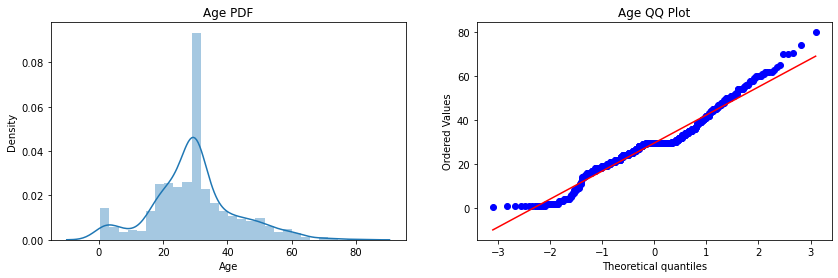

In [14]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"], dist="norm", plot = plt)
plt.title("Age QQ Plot")

plt.show()

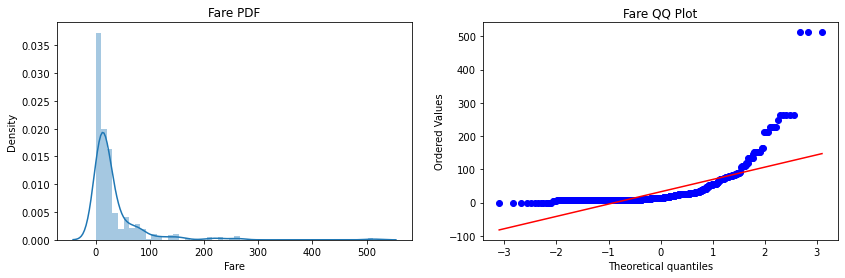

In [15]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"], dist="norm", plot = plt)
plt.title("Fare QQ Plot")

plt.show()

In [16]:
clf     = LogisticRegression()
clf2    = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred  = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f"Accuracy of LR: {accuracy_score(y_test, y_pred)}")
print(f"Accuracy of DT: {accuracy_score(y_test, y_pred2)}")

Accuracy of LR: 0.6480446927374302
Accuracy of DT: 0.6536312849162011


In [17]:
trf                 = FunctionTransformer(func = np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed  = trf.transform(X_test)

In [19]:
clf     = LogisticRegression()
clf2    = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred  = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print(f"Accuracy of LR: {accuracy_score(y_test, y_pred)}")
print(f"Accuracy of DT: {accuracy_score(y_test, y_pred2)}")

Accuracy of LR: 0.6815642458100558
Accuracy of DT: 0.6703910614525139


In [23]:
X_transformed = trf.fit_transform(X)

clf           = LogisticRegression()
clf2          = DecisionTreeClassifier()

print(f"LR: {np.mean(cross_val_score(clf, X_transformed, y, scoring = 'accuracy', cv = 10))}")
print(f"DT: {np.mean(cross_val_score(clf2, X_transformed, y, scoring = 'accuracy', cv = 10))}")

LR: 0.678027465667915
DT: 0.6621972534332086


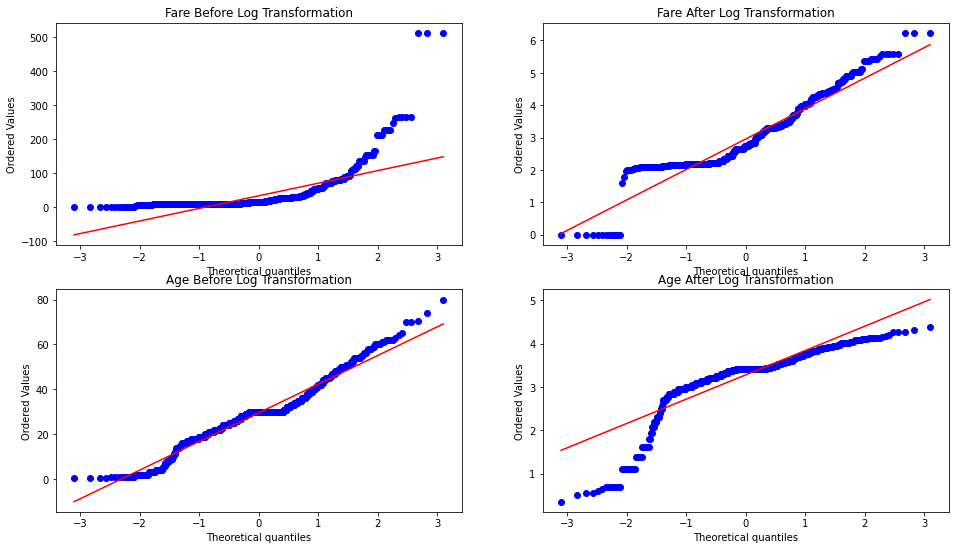

In [26]:
plt.figure(figsize = (16, 9))

plt.subplot(221)
stats.probplot(X_train["Fare"], dist = "norm", plot = plt)
plt.title("Fare Before Log Transformation")

plt.subplot(222)
stats.probplot(X_train_transformed["Fare"], dist = "norm", plot = plt)
plt.title("Fare After Log Transformation")

plt.subplot(223)
stats.probplot(X_train["Age"], dist = "norm", plot = plt)
plt.title("Age Before Log Transformation")

plt.subplot(224)
stats.probplot(X_train_transformed["Age"], dist = "norm", plot = plt)
plt.title("Age After Log Transformation")

plt.show()

In [27]:
trf2 = ColumnTransformer(
    [
        ("log", FunctionTransformer(np.log1p), ["Fare"]),
    ],
    remainder = "passthrough"
)

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2  = trf2.transform(X_test)

In [29]:
X_train_transformed2

array([[ 3.38439026, 45.5       ],
       [ 2.63905733, 23.        ],
       [ 2.18885633, 32.        ],
       ...,
       [ 2.71524426, 41.        ],
       [ 4.79579055, 14.        ],
       [ 4.36038795, 21.        ]])

In [28]:
clf    = LogisticRegression()
clf2   = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred  = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print(f"Accuracy LR: {accuracy_score(y_test, y_pred)}")
print(f"Accuracy DT: {accuracy_score(y_test, y_pred2)}")

Accuracy LR: 0.4022346368715084
Accuracy DT: 0.4972067039106145


In [31]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print(f"LR: {np.mean(cross_val_score(clf, X_transformed2, y, scoring = 'accuracy', cv = 10))}")
print(f"DT: {np.mean(cross_val_score(clf2, X_transformed2, y, scoring = 'accuracy', cv = 10))}")

LR: 0.6712609238451936
DT: 0.6521223470661672


## Other Transformations

- Reciprocal Transformation ($\frac{1}{X}$)
- Square Transformation ($X^2$)
- Square Root Transformation ($\sqrt{X}$)

In [35]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]
    
    trf = ColumnTransformer(
        [
            ("log", FunctionTransformer(transform), ["Fare"])
        ],
        remainder = "passthrough"
    )
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print(f"Accuracy: {np.mean(cross_val_score(clf, X_trans, y, scoring = 'accuracy', cv = 10))}")
    
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    stats.probplot(X["Fare"], dist = "norm", plot = plt)
    plt.title("Fare Before Transform")
    
    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist = "norm", plot = plt)
    plt.title("Fare After Transform")
    
    plt.show()

Accuracy: 0.6589013732833957


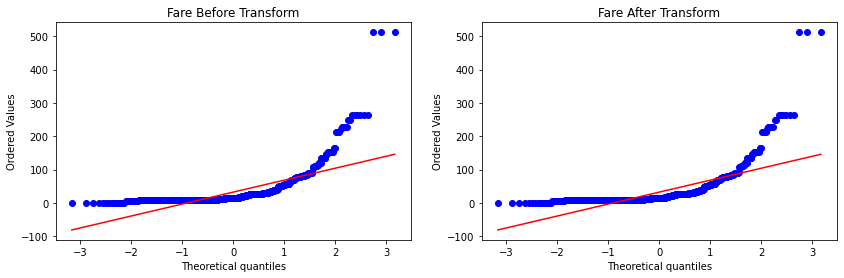

In [36]:
apply_transform(lambda x: x)

### Square Transformation

Accuracy: 0.6442446941323345


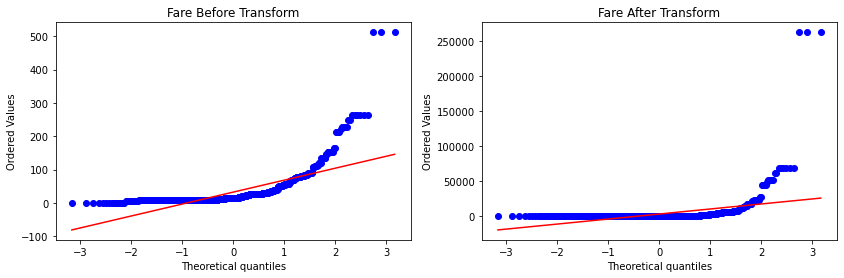

In [37]:
# square transformation
apply_transform(lambda x: x**2)

### Cube Transformation

Accuracy: 0.39843945068664166


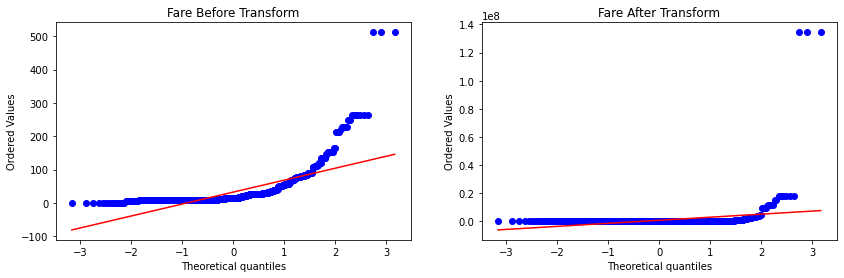

In [38]:
# cube transformation
apply_transform(lambda x: x**3)

### Square Root Transformation

Accuracy: 0.6611485642946316


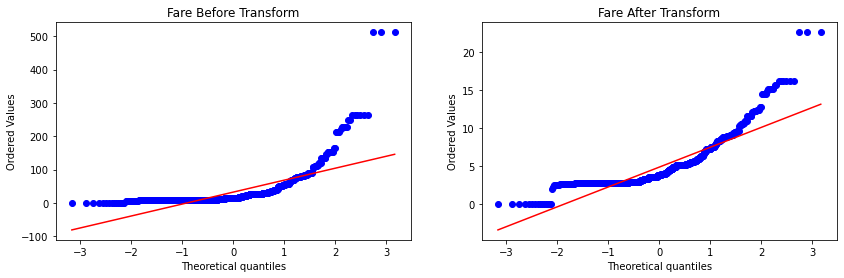

In [39]:
# square root transformation
apply_transform(lambda x: x**(1/2))

### Resiprocal Transformation

Accuracy: 0.61729088639201


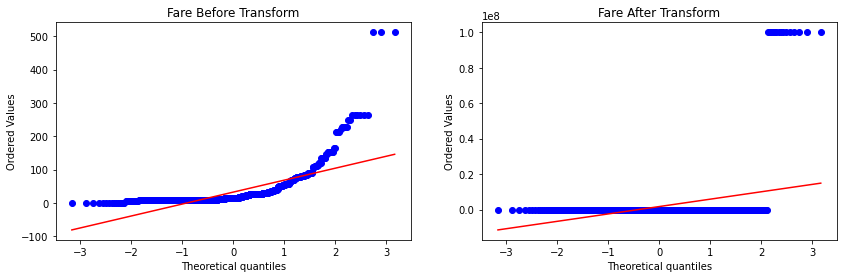

In [42]:
# resiprocal transformation
apply_transform(lambda x: 1/(x + 0.00000001))

### Sign Transformation

Accuracy: 0.6195131086142323


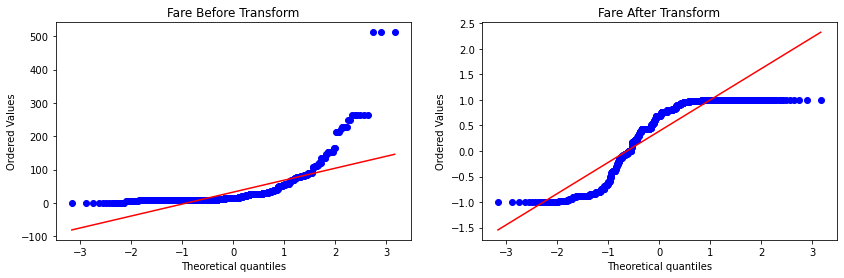

In [43]:
# sign transformation
apply_transform(lambda x: np.sin(x))